In [54]:
import pandas as pd
import pyodbc
import pickle

In [2]:
server = 'database2108.database.windows.net' 
database = 'group6' 
username = 'group6user' 
password = 'everythingIsAwesome!'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
# select 26 rows from SQL table to insert in dataframe.
query = "SELECT * FROM dbo.videogamesSales_test1;"
df = pd.read_sql(query, cnxn)
df.head()

,Critic_Score,Developer,ESRB_Rating,Genre,Global_Sales,JP_Sales,NA_Sales,Name,Other_Sales,PAL_Sales,Platform,Publisher,Rank,Year,basename,timestamp
0,9.0,MachineGames,M,Shooter,1.36,0.01,0.55,Wolfenstein II: The New Colossus,0.22,0.58,PS4,Bethesda Softworks,1676,2017,wolfenstein-ii-the-new-colossus,1635304608447
1,NaN,id Software,None,Shooter,2.92,0.04,0.93,Doom (2016),0.46,1.48,PS4,Bethesda Softworks,592,2016,doom-2016,1635304263943
2,8.7,Insomniac Games,E10,Platform,1.89,0.03,1.05,Ratchet & Clank Future: A Crack in Time,0.26,0.55,PS3,Sony Computer Entertainment,1090,2009,ratchet-amp-clank-future-a-crack-in-time,1635304436252
3,NaN,Konami,None,Shooter,1.36,1.00,0.27,Gradius,0.01,0.08,NES,Konami,1678,1986,gradius,1635304609455
4,8.6,EA Tiburon,E,Sports,1.89,0.00,1.56,Madden NFL 09,0.18,0.15,PS3,EA Sports,1091,2008,madden-nfl-09,1635304437306


In [3]:
globaldf = df.drop(columns=['JP_Sales','NA_Sales','Other_Sales','PAL_Sales','Name','timestamp','basename'])


In [4]:
globaldf = pd.get_dummies(globaldf, columns=['Developer','Genre','Publisher','ESRB_Rating','Platform'], drop_first=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  441 non-null    float64
 1   Developer     678 non-null    object 
 2   ESRB_Rating   652 non-null    object 
 3   Genre         678 non-null    object 
 4   Global_Sales  678 non-null    float64
 5   JP_Sales      678 non-null    float64
 6   NA_Sales      678 non-null    float64
 7   Name          678 non-null    object 
 8   Other_Sales   678 non-null    float64
 9   PAL_Sales     678 non-null    float64
 10  Platform      678 non-null    object 
 11  Publisher     678 non-null    object 
 12  Rank          678 non-null    int64  
 13  Year          678 non-null    int64  
 14  basename      678 non-null    object 
 15  timestamp     678 non-null    int64  
dtypes: float64(6), int64(3), object(7)
memory usage: 84.9+ KB


In [10]:
#globaldf.Critic_Score.replace(inplace=True)
globaldf.dropna(inplace=True)
globaldf

,Critic_Score,Global_Sales,Rank,Year,Developer_2K Boston / 2K Australia / 2K Marin,Developer_2K Marin,Developer_343 Industries,Developer_4J Studios,Developer_5TH Cell,Developer_Acquire,...,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,9.0,1.36,1676,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.7,1.89,1090,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.6,1.89,1091,2008,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9.2,2.91,593,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,6.0,2.32,825,1998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,8.8,1.38,1645,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
670,8.8,1.38,1648,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
673,8.7,1.37,1658,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
674,8.1,1.37,1660,2010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
y = globaldf[['Global_Sales']]
x = globaldf.drop(columns='Global_Sales')
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.7)

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
residual = (y_test - y_pred)

In [13]:
print('Mean squared error: {}'.format(mean_squared_error(y_test,y_pred)))
print('R squared value (Testing data): {}'.format(r2_score(y_test,y_pred)))
print('R squared value (Training data): {}'.format(r2_score(y_train,y_pred)))

Mean squared error: 6.11847410562196
R squared value: 0.4639991108750906


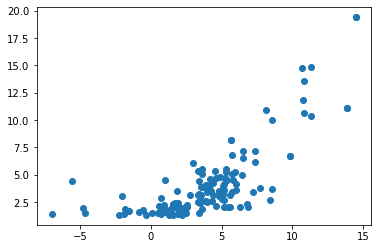

In [14]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)

In [49]:
regr = linear_model.Lasso(alpha=0.001)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
y_pred=y_pred.reshape(133,1)
residual = (y_test - y_pred)

In [50]:
print('Mean squared error: {}'.format(mean_squared_error(y_test,y_pred)))
print('R squared value (Testing data): {}'.format(r2_score(y_test,y_pred)))
print('R squared value (Training data): {}'.format(r2_score(y_train,y_pred)))

Mean squared error: 3.5263853528255233
R squared value: 0.691075642082921


In [53]:
import numpy as np
from sklearn.linear_model import LassoCV
alphas = np.logspace(-3, 0.5, 30)
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
lasso_cv.fit(x_train,y_train.values.ravel())
print('Optimal Alpha: ',lasso_cv.alpha_)

print('R2 Score: ',lasso_cv.score(x_train,y_train.values.ravel()))
print('R2 Score(test): ',lasso_cv.score(x_test,y_test))

Optimal Alpha:  0.009236708571873866
R2 Score:  0.8102102382985102
R2 Score(test):  0.7216506634215213


In [56]:
filename = 'lassocvmodel.pkl'
pickle.dump(lasso_cv, open(filename, 'wb'))

In [52]:
y_pred = lasso_cv.predict(x_test)
y_pred=y_pred.reshape(133,1)
residual = (y_test - y_pred)


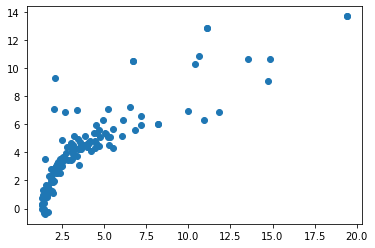

In [46]:
plt.scatter(y_test,y_pred)

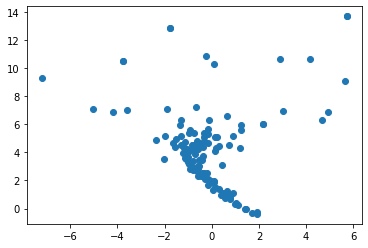

In [48]:
plt.scatter(residual,y_pred)